In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Gerando Dados

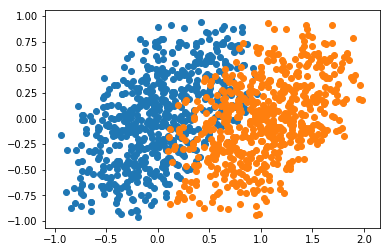

In [2]:
num_samples = 600
class_A = [np.linspace(0,1,num_samples)-np.random.rand(num_samples), #X
         np.linspace(0,1,num_samples)-np.random.rand(num_samples)] #Y

class_B  = [np.linspace(1,2,num_samples)-np.random.rand(num_samples), #X
         np.linspace(0,1,num_samples)-np.random.rand(num_samples)] #Y

fig, ax = plt.subplots()
ax.scatter(class_A[0], class_A[1])
ax.scatter(class_B[0], class_B[1])

X = np.append(class_A, class_B, axis=-1)
Y = np.append(np.zeros(len(class_A[0]), dtype=float), np.ones(len(class_B[0]), dtype=float))

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y, test_size=0.4)
Y_train = np.expand_dims(Y_train, axis=-1)
Y_test =  np.expand_dims(Y_test, axis=-1)

## Construindo a rede

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x*(1-x)

In [4]:
class NeuralNetwork:
    def __init__(self, x, y, lr=1, num_units = 20):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],num_units) 
        self.bias1      = np.random.rand(1, num_units)
        self.weights2   = np.random.rand(num_units,1)
        self.bias2      = np.random.random()
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.error      = np.zeros(self.y.shape)
        
        self.learning_rate = lr

    def forward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1)  + self.bias1)
        self.output = sigmoid(np.dot(self.layer1, self.weights2) + self.bias2)

    def backprop(self):
        self.error = abs(self.y - self.output)
        # Layer 2
        delta2 = 2*(self.y - self.output) * sigmoid_derivative(self.output)
        d_weights2 = np.dot(self.layer1.T, delta2)
        d_bias2    = np.sum(delta2)
        # Layer 1
        delta1     = np.dot(delta2, self.weights2.T) * sigmoid_derivative(self.layer1)
        d_weights1 = np.dot(self.input.T,  delta1)
        d_bias1    = np.sum(delta1)
        
        # update the weights with the derivative (slope) of the loss function
        self.weights1 += self.learning_rate * d_weights1
        self.weights2 += self.learning_rate * d_weights2
        self.bias1    += self.learning_rate * d_bias1
        self.bias2    += self.learning_rate * d_bias2
    
    def calc_error(self, y):
        return abs(y - self.output)
        
    def predict(self, x):
        train_input = self.input
        self.input = x
        self.forward()
        self.input = train_input
        return self.output

## Qual o efeito de alterar a taxa de aprendizado? (*learning rate*)

Text(0.5,1,u'error')

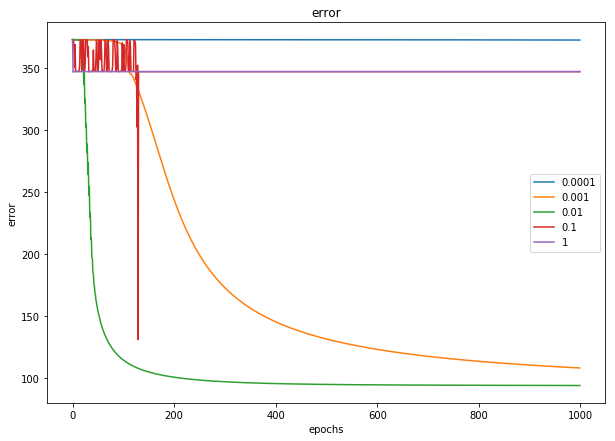

In [5]:
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1,1]
plt.figure(figsize=(10,7))

for lr in learning_rates:
    nn = NeuralNetwork(X_train, Y_train, lr=lr) 
    all_error = []
    for i in range(1000):
        nn.forward()
        nn.backprop()
        all_error.append(np.squeeze(nn.error))

    plt.plot(range(len(all_error)), np.sum(all_error, axis=1) ,label=lr)

plt.legend()
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('error')

## Qual o efeito de alterar o número de unidades na camada escondida?
**fixe a taxa de aprendizado para aquela de melhor desempenho na etapa anterior**

Text(0.5,1,u'Number of Units')

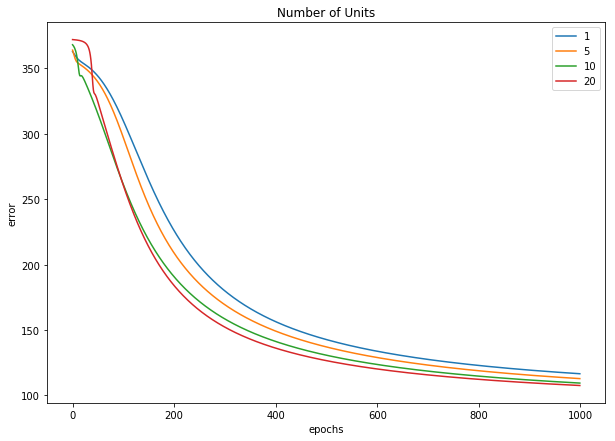

In [6]:
lr = 1e-3
num_units = [1,5,10,20]
plt.figure(figsize=(10,7))

for nu in num_units:
    nn = NeuralNetwork(X_train, Y_train, lr=lr, num_units=nu) 
    all_error = []
    for i in range(1000):
        nn.forward()
        nn.backprop()
        all_error.append(np.squeeze(nn.error))

    plt.plot(range(len(all_error)), np.sum(all_error, axis=1) ,label=nu)

plt.legend()
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('Number of Units')